### Airline delays and cancellations - Classification 

Link for the dataset: https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations?select=train.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_data = pd.read_csv('flightsdata.csv')
df_data

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542338,6,4,0,1500-1559,2,5,4,70,Comair Inc.,1190,...,Philadelphia International,0.00,0.0,0.0,86.0,4.92,0.217198,0.222554,0.251477,0.292230
4542339,4,4,1,2100-2159,2,9,12,143,Southwest Airlines Co.,5669,...,Austin - Bergstrom International,0.00,0.0,0.0,85.0,8.05,0.215726,0.192585,0.171317,0.263840
4542340,4,7,1,1900-1959,6,5,21,175,Southwest Airlines Co.,14827,...,Portland International,0.00,0.0,0.0,89.0,4.03,0.215726,0.112840,0.203724,0.266095
4542341,12,7,0,2000-2059,3,6,69,110,Delta Air Lines Inc.,13603,...,Douglas Municipal,0.38,0.0,0.0,44.0,9.17,0.157390,0.186040,0.226980,0.286800


#### Details of the data
MONTH:				Month, 
DAY_OF_WEEK:			Day of Week, 
DEP_DEL15: 			TARGET Binary of a departure delay over 15 minutes (1 is yes), 
DISTANCE_GROUP:			Distance group to be flown by departing aircraft, 
DEP_BLOCK:			Departure block, 
SEGMENT_NUMBER:			The segment that this tail number is on for the day, 
CONCURRENT_FLIGHTS:		Concurrent flights leaving from the airport in the same departure block, 
NUMBER_OF_SEATS:		Number of seats on the aircraft, 
CARRIER_NAME:			Carrier, 
AIRPORT_FLIGHTS_MONTH:		Avg Airport Flights per Month, 
AIRLINE_FLIGHTS_MONTH:		Avg Airline Flights per Month, 
AIRLINE_AIRPORT_FLIGHTS_MONTH:	Avg Flights per month for Airline AND Airport, 
AVG_MONTHLY_PASS_AIRPORT:	Avg Passengers for the departing airport for the month, 
AVG_MONTHLY_PASS_AIRLINE:	Avg Passengers for airline for month, 
FLT_ATTENDANTS_PER_PASS:	Flight attendants per passenger for airline, 
GROUND_SERV_PER_PASS:		Ground service employees (service desk) per passenger for airline, 
PLANE_AGE:			Age of departing aircraft, 
DEPARTING_AIRPORT:		Departing Airport, 
LATITUDE:			Latitude of departing airport, 
LONGITUDE:			Longitude of departing airport, 
PREVIOUS_AIRPORT:		Previous airport that aircraft departed from, 
PRCP:				Inches of precipitation for day,
SNOW:				Inches of snowfall for day,
SNWD:				Inches of snow on ground for day,
TMAX:				Max temperature for day,
AWND:				Max wind speed for day

The dataset has 4542343 rows, I am going to use a sample of 20000 rows for this project.

### Data Preprocessing

In [3]:
df = df_data.sample(n=20000, random_state=123)

In [4]:
df

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
1441696,7,3,0,0001-0559,5,1,10,128,American Airlines Inc.,5978,...,NONE,0.00,0.0,0.0,89.0,7.61,0.237709,0.187867,0.203027,0.082787
1574670,5,2,0,1400-1459,5,3,66,160,American Airlines Inc.,25360,...,Pittsburgh International,0.00,0.0,0.0,84.0,11.41,0.257273,0.169480,0.190877,0.238104
1583300,8,1,0,1000-1059,11,1,43,188,American Airlines Inc.,14177,...,NONE,0.00,0.0,0.0,109.0,5.82,0.228215,0.187867,0.181217,0.153846
2258981,1,7,0,0800-0859,3,2,30,180,Delta Air Lines Inc.,30842,...,Raleigh-Durham International,0.00,0.0,0.0,51.0,2.01,0.130691,0.180153,0.178567,0.105792
1810871,4,5,0,0700-0759,1,2,58,90,Comair Inc.,18979,...,Charlottesville Albemarle,0.15,0.0,0.0,78.0,17.00,0.225378,0.187867,0.232426,0.094280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425218,11,2,1,1600-1659,1,6,47,44,American Eagle Airlines Inc.,26830,...,Joplin Municipal,0.00,0.0,3.1,17.0,9.40,0.117559,0.187867,0.153130,0.176146
983315,11,5,0,1500-1559,3,5,9,120,Alaska Airlines Inc.,1267,...,Fairbanks International,0.00,0.0,0.0,37.0,7.16,0.137639,0.187867,0.153722,0.169077
2207169,2,6,0,1300-1359,3,3,4,50,SkyWest Airlines Inc.,1650,...,Chicago O'Hare International,0.00,0.0,0.0,46.0,13.65,0.239249,0.276150,0.163939,0.246487
1671252,10,2,0,0001-0559,2,1,7,128,American Airlines Inc.,4135,...,NONE,0.00,0.0,0.0,93.0,10.29,0.172082,0.187867,0.135091,0.068979


**TARGET variable is the "DEP_DEL15" which is the Binary value of a departure delay over 15 minutes (1 is yes)**

In [5]:
# Changing the target variable to y
df.rename(columns={'DEP_DEL15': 'y'}, inplace=True)

In [6]:
df.y.value_counts()

0    16125
1     3875
Name: y, dtype: int64

In [7]:
X = df.drop(['y'], axis=1)
X

,MONTH,DAY_OF_WEEK,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
1441696,7,3,0001-0559,5,1,10,128,American Airlines Inc.,5978,79247,...,NONE,0.00,0.0,0.0,89.0,7.61,0.237709,0.187867,0.203027,0.082787
1574670,5,2,1400-1459,5,3,66,160,American Airlines Inc.,25360,78894,...,Pittsburgh International,0.00,0.0,0.0,84.0,11.41,0.257273,0.169480,0.190877,0.238104
1583300,8,1,1000-1059,11,1,43,188,American Airlines Inc.,14177,80820,...,NONE,0.00,0.0,0.0,109.0,5.82,0.228215,0.187867,0.181217,0.153846
2258981,1,7,0800-0859,3,2,30,180,Delta Air Lines Inc.,30842,73508,...,Raleigh-Durham International,0.00,0.0,0.0,51.0,2.01,0.130691,0.180153,0.178567,0.105792
1810871,4,5,0700-0759,1,2,58,90,Comair Inc.,18979,23434,...,Charlottesville Albemarle,0.15,0.0,0.0,78.0,17.00,0.225378,0.187867,0.232426,0.094280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425218,11,2,1600-1659,1,6,47,44,American Eagle Airlines Inc.,26830,25517,...,Joplin Municipal,0.00,0.0,3.1,17.0,9.40,0.117559,0.187867,0.153130,0.176146
983315,11,5,1500-1559,3,5,9,120,Alaska Airlines Inc.,1267,20832,...,Fairbanks International,0.00,0.0,0.0,37.0,7.16,0.137639,0.187867,0.153722,0.169077
2207169,2,6,1300-1359,3,3,4,50,SkyWest Airlines Inc.,1650,56790,...,Chicago O'Hare International,0.00,0.0,0.0,46.0,13.65,0.239249,0.276150,0.163939,0.246487
1671252,10,2,0001-0559,2,1,7,128,American Airlines Inc.,4135,80161,...,NONE,0.00,0.0,0.0,93.0,10.29,0.172082,0.187867,0.135091,0.068979


In [8]:
y = df.y
y.head()

1441696    0
1574670    0
1583300    0
2258981    0
1810871    0
Name: y, dtype: int64

In [9]:
X.dtypes

MONTH                              int64
DAY_OF_WEEK                        int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX                             float64
AWND            

In [10]:
X.isna().sum()

MONTH                            0
DAY_OF_WEEK                      0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
CARRIER_HISTORICAL               0
DEP_AIRPORT_HIST                 0
DAY_HISTORICAL                   0
DEP_BLOCK_HIST      

The dataset has no null values.

In [11]:
y.isna().sum()

0

In [12]:
X.shape

(20000, 29)

In [13]:
X.describe()

,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,6.610700,3.965200,3.818150,3.052200,27.851350,133.760300,12710.794550,63149.719350,3479.848500,1.595879e+06,...,-94.197245,0.101801,0.025940,0.088090,71.592045,8.321530,0.189130,0.187988,0.188885,0.189430
std,3.399136,1.998196,2.393589,1.751836,21.367573,46.255963,8835.472622,34197.693647,4270.474813,1.126077e+06,...,17.859707,0.350070,0.266326,0.717673,18.425866,3.599207,0.047252,0.041951,0.038458,0.077659
min,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,1100.000000,5582.000000,4.000000,7.047600e+04,...,-159.346000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.064408,0.043423,0.104450,0.055562
25%,4.000000,2.000000,2.000000,2.000000,11.000000,90.000000,5353.000000,25138.000000,663.000000,6.732210e+05,...,-106.377000,0.000000,0.000000,0.000000,59.000000,5.820000,0.155508,0.166342,0.159489,0.127692
50%,7.000000,4.000000,3.000000,3.000000,23.000000,143.000000,11587.000000,70878.000000,2257.000000,1.486066e+06,...,-87.906000,0.000000,0.000000,0.000000,75.000000,7.830000,0.187820,0.187867,0.191473,0.187484
75%,10.000000,6.000000,5.000000,4.000000,39.000000,172.000000,17725.000000,86312.000000,4835.000000,2.006675e+06,...,-80.936000,0.020000,0.000000,0.000000,86.000000,10.290000,0.215945,0.202736,0.219939,0.243702
max,12.000000,7.000000,11.000000,14.000000,109.000000,337.000000,35256.000000,117728.000000,21837.000000,4.365661e+06,...,-70.304000,11.630000,8.500000,25.200000,115.000000,33.780000,0.350235,0.352160,0.270709,0.390600


### Exploratory Data Analysis

Text(0.5, 1.0, 'Histogram of days')

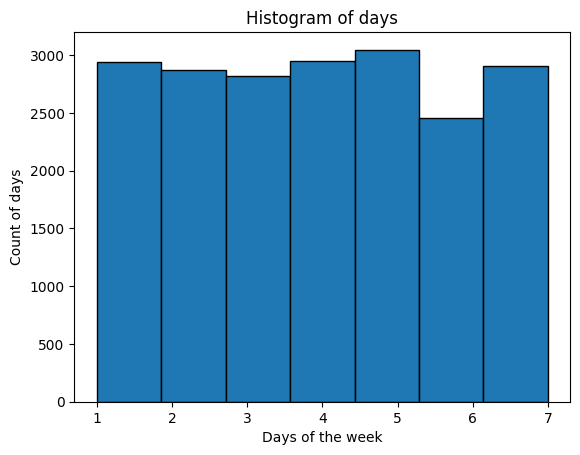

In [14]:
plt.hist(df.DAY_OF_WEEK, bins=7, edgecolor='black')
plt.xlabel('Days of the week')
plt.ylabel('Count of days')
plt.title('Histogram of days')

array([[<Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>,
        <Axes: title={'center': 'DISTANCE_GROUP'}>,
        <Axes: title={'center': 'SEGMENT_NUMBER'}>,
        <Axes: title={'center': 'CONCURRENT_FLIGHTS'}>],
       [<Axes: title={'center': 'NUMBER_OF_SEATS'}>,
        <Axes: title={'center': 'AIRPORT_FLIGHTS_MONTH'}>,
        <Axes: title={'center': 'AIRLINE_FLIGHTS_MONTH'}>,
        <Axes: title={'center': 'AIRLINE_AIRPORT_FLIGHTS_MONTH'}>,
        <Axes: title={'center': 'AVG_MONTHLY_PASS_AIRPORT'}>],
       [<Axes: title={'center': 'AVG_MONTHLY_PASS_AIRLINE'}>,
        <Axes: title={'center': 'FLT_ATTENDANTS_PER_PASS'}>,
        <Axes: title={'center': 'GROUND_SERV_PER_PASS'}>,
        <Axes: title={'center': 'PLANE_AGE'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PRCP'}>,
        <Axes: title={'center': 'SNOW'}>,
        <Axes: title={'center': 'SNWD'}>

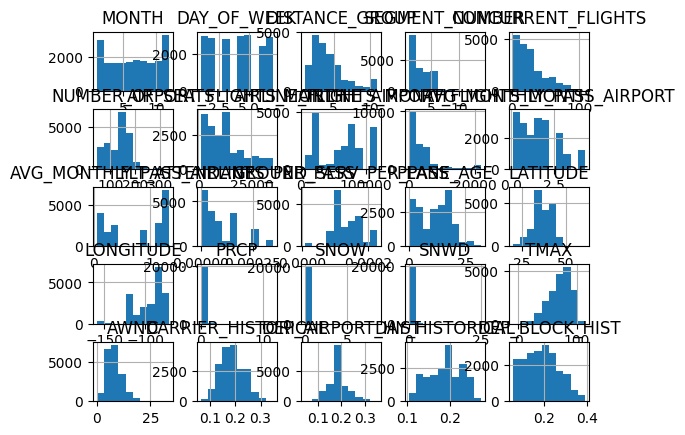

In [15]:
# checking distributions
X.hist()

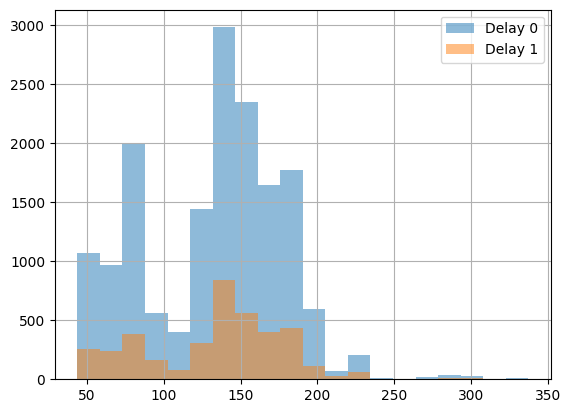

In [16]:
delay_0 = df[df['y'] == 0]['NUMBER_OF_SEATS']
delay_1 = df[df['y'] == 1]['NUMBER_OF_SEATS']

# Histograms
plt.hist(delay_0, alpha=0.5, bins = 20, label='Delay 0')
plt.hist(delay_1, alpha=0.5, bins = 20, label='Delay 1')
plt.legend()
plt.grid()

Flights with seats around 140 had more number of delays

<Axes: xlabel='count', ylabel='y'>

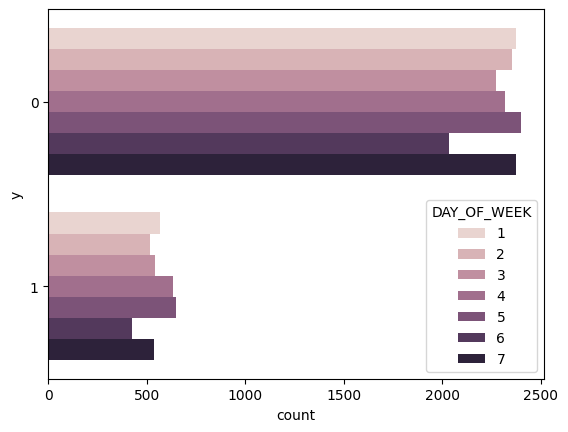

In [17]:
sns.countplot(data=df, y='y', hue='DAY_OF_WEEK')

Saturday had less number of delays compared to other days

<Axes: xlabel='count', ylabel='y'>

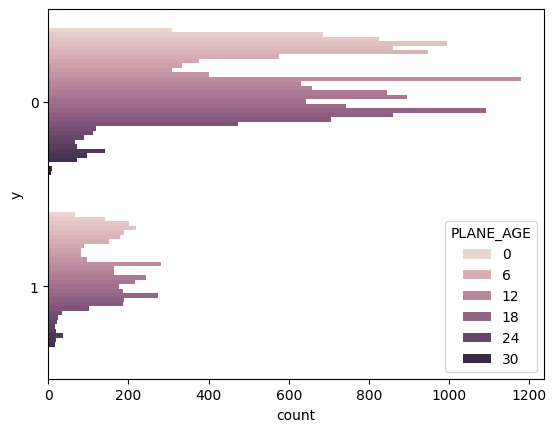

In [18]:
sns.countplot(data=df, y='y', hue='PLANE_AGE')

Planes around the age of 12 had more number of delays.

In [19]:
xcorr = X.corr()
xcorr

C:\Users\SRINI\AppData\Local\Temp\ipykernel_20008\4040091918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  xcorr = X.corr()


,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,...,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
MONTH,1.000000,0.014768,0.001064,0.022844,0.021843,0.004107,0.038344,0.049508,0.022765,-0.002206,...,-0.008115,-0.007409,-0.056402,-0.097672,0.183736,-0.128206,-0.170460,-0.119735,-0.206747,-0.096651
DAY_OF_WEEK,0.014768,1.000000,0.004542,-0.034263,-0.032030,0.013573,-0.000929,0.001494,0.001444,0.001160,...,-0.007619,0.021253,-0.017161,-0.014920,0.007287,-0.004718,0.002183,0.002188,0.002000,0.003701
DISTANCE_GROUP,0.001064,0.004542,1.000000,-0.244328,-0.032106,0.451554,-0.016909,-0.015196,-0.044801,0.035888,...,-0.166931,-0.008756,-0.000538,-0.011018,-0.000872,0.037039,0.031687,0.052136,0.001904,-0.045792
SEGMENT_NUMBER,0.022844,-0.034263,-0.244328,1.000000,0.025112,-0.203073,0.050123,0.031710,0.061640,0.031170,...,-0.058125,-0.015529,-0.012312,-0.024633,0.033319,-0.037776,-0.006428,-0.046638,0.014221,0.653977
CONCURRENT_FLIGHTS,0.021843,-0.032030,-0.032106,0.025112,1.000000,-0.050826,0.847265,-0.036988,0.582812,0.807087,...,0.118658,-0.015884,-0.012790,-0.026177,0.033643,0.059811,-0.072526,-0.047094,0.012319,0.058278
NUMBER_OF_SEATS,0.004107,0.013573,0.451554,-0.203073,-0.050826,1.000000,0.004142,0.303776,0.163944,0.065235,...,-0.163553,-0.008700,-0.000543,-0.019153,0.067452,-0.013486,0.066585,0.055470,0.002384,-0.036080
AIRPORT_FLIGHTS_MONTH,0.038344,-0.000929,-0.016909,0.050123,0.847265,0.004142,1.000000,-0.016261,0.650126,0.967615,...,0.089480,-0.013334,-0.000791,-0.030751,0.049493,0.062772,-0.061265,-0.035249,0.001308,0.089502
AIRLINE_FLIGHTS_MONTH,0.049508,0.001494,-0.015196,0.031710,-0.036988,0.303776,-0.016261,1.000000,0.225919,-0.008288,...,-0.067813,-0.015751,-0.024975,-0.033637,0.083748,-0.052148,0.032987,0.047976,0.021554,0.009932
AIRLINE_AIRPORT_FLIGHTS_MONTH,0.022765,0.001444,-0.044801,0.061640,0.582812,0.163944,0.650126,0.225919,1.000000,0.645883,...,0.069933,-0.008694,-0.019050,-0.030419,0.065441,-0.002240,-0.111314,-0.049601,-0.003301,0.084566
AVG_MONTHLY_PASS_AIRPORT,-0.002206,0.001160,0.035888,0.031170,0.807087,0.065235,0.967615,-0.008288,0.645883,1.000000,...,0.027345,-0.018128,0.004555,-0.024677,0.024314,0.059535,-0.072450,-0.040607,-0.004939,0.082099


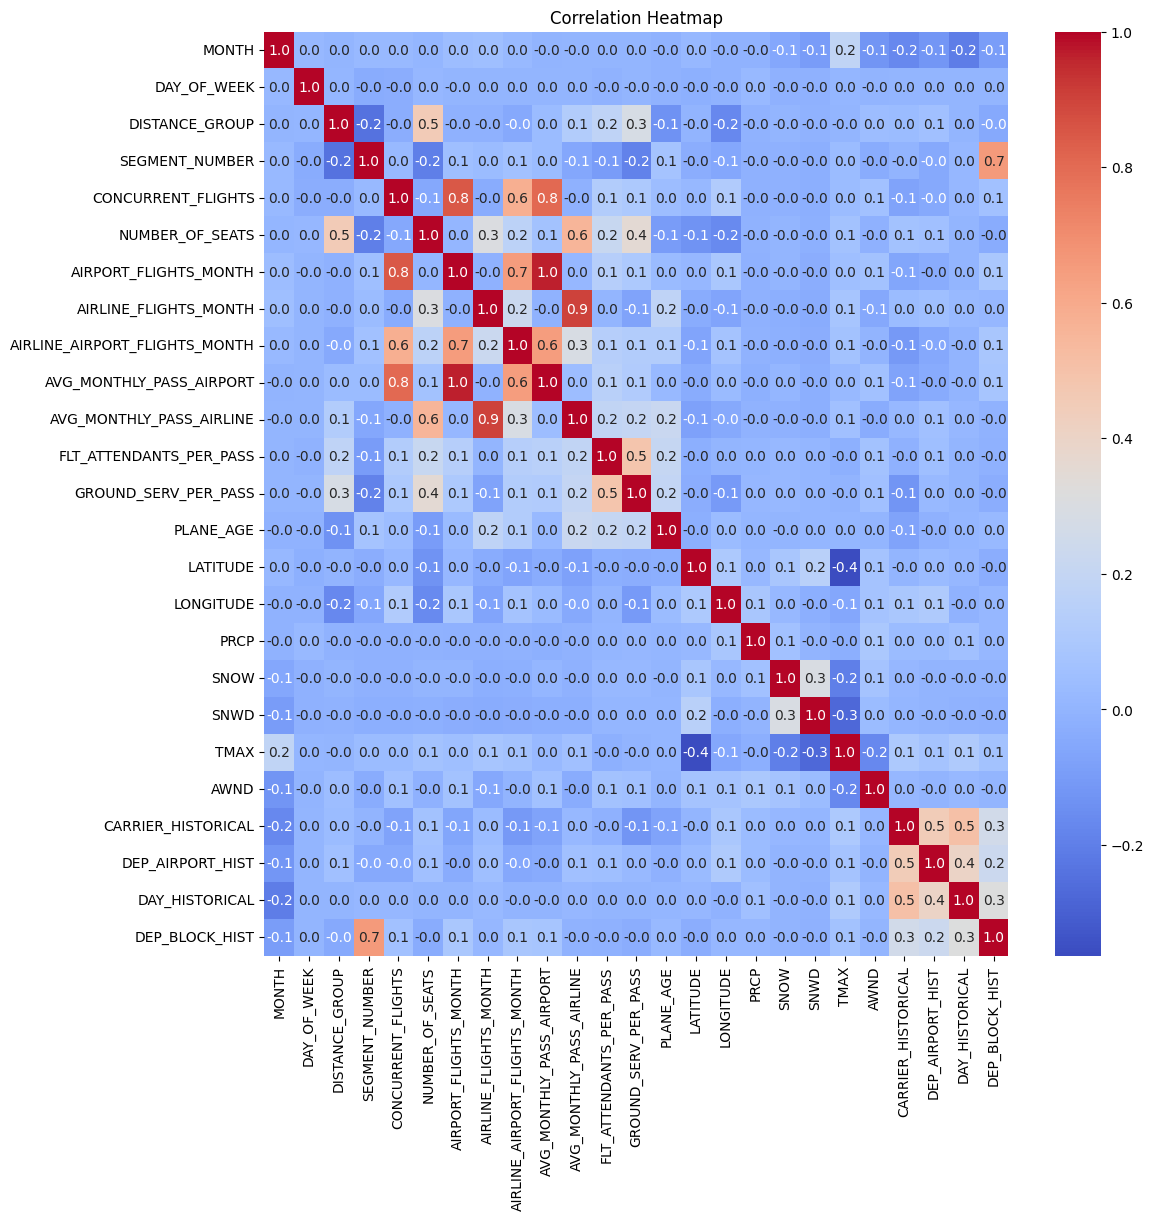

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(xcorr, cmap='coolwarm', annot=True, fmt=".1f", ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

AVG_MONTHLY_PASS_AIRPORT and AIRPORT_FLIGHTS_MONTH are highly correlated.

In [21]:
y

1441696    0
1574670    0
1583300    0
2258981    0
1810871    0
          ..
2425218    1
983315     0
2207169    0
1671252    0
2364318    0
Name: y, Length: 20000, dtype: int64

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1441696 to 2364318
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          20000 non-null  int64  
 1   DAY_OF_WEEK                    20000 non-null  int64  
 2   DEP_TIME_BLK                   20000 non-null  object 
 3   DISTANCE_GROUP                 20000 non-null  int64  
 4   SEGMENT_NUMBER                 20000 non-null  int64  
 5   CONCURRENT_FLIGHTS             20000 non-null  int64  
 6   NUMBER_OF_SEATS                20000 non-null  int64  
 7   CARRIER_NAME                   20000 non-null  object 
 8   AIRPORT_FLIGHTS_MONTH          20000 non-null  int64  
 9   AIRLINE_FLIGHTS_MONTH          20000 non-null  int64  
 10  AIRLINE_AIRPORT_FLIGHTS_MONTH  20000 non-null  int64  
 11  AVG_MONTHLY_PASS_AIRPORT       20000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRLINE       20000 n

In [23]:
# Removing non-numeric variables
col_drop = ['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
X = X.drop(columns=col_drop)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1441696 to 2364318
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          20000 non-null  int64  
 1   DAY_OF_WEEK                    20000 non-null  int64  
 2   DISTANCE_GROUP                 20000 non-null  int64  
 3   SEGMENT_NUMBER                 20000 non-null  int64  
 4   CONCURRENT_FLIGHTS             20000 non-null  int64  
 5   NUMBER_OF_SEATS                20000 non-null  int64  
 6   AIRPORT_FLIGHTS_MONTH          20000 non-null  int64  
 7   AIRLINE_FLIGHTS_MONTH          20000 non-null  int64  
 8   AIRLINE_AIRPORT_FLIGHTS_MONTH  20000 non-null  int64  
 9   AVG_MONTHLY_PASS_AIRPORT       20000 non-null  int64  
 10  AVG_MONTHLY_PASS_AIRLINE       20000 non-null  int64  
 11  FLT_ATTENDANTS_PER_PASS        20000 non-null  float64
 12  GROUND_SERV_PER_PASS           20000 n

In [25]:
# split the datasets into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [26]:
y_train.value_counts(normalize=True)

0    0.806267
1    0.193733
Name: y, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

0    0.8062
1    0.1938
Name: y, dtype: float64

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression(max_iter = 10000, C=0.1)

In [30]:
# Initiating Logistic Regression and fitting the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000, C=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [31]:
# making predictions
pred_tr = clf.predict(X_train)
pred_tr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
pred_ts = clf.predict(X_test)
pred_ts

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
# calculating training and testing accuracy scores
(y_train == pred_tr).mean()

0.8062666666666667

In [34]:
(y_test == pred_ts).mean()

0.8062

In [35]:
from sklearn import metrics
# Creating confusion matrix
confusion_tr = metrics.confusion_matrix(y_train, pred_tr)
confusion_tr

array([[12094,     0],
       [ 2906,     0]], dtype=int64)

In [36]:
# accuracy for test
confusion_ts = metrics.confusion_matrix(y_test, pred_ts)
confusion_ts

array([[4031,    0],
       [ 969,    0]], dtype=int64)

In [37]:
from sklearn.metrics import recall_score
# Recall(Sensitivity)
recall = recall_score(y_test, pred_ts)
recall

0.0

In [38]:
from sklearn.metrics import precision_score
# Precision
precision = metrics.precision_score(y_test, pred_ts)
precision

C:\Users\SRINI\anaconda3\envs\spyder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [39]:
from sklearn.metrics import f1_score
# Calculating F1 score
f1score = metrics.f1_score(y_test, pred_ts)
f1score

0.0

The F1 score of 0 resembles that the logistic regression model is performing poorly. We'll try to improve performance by normalizing the data.

### Normalizing the data to check whether it chnages the performance

In [40]:
from sklearn import preprocessing

In [41]:
# Using Standard scalar to scale the data
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [42]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5]

In [43]:
# Initializing empty lists
train_accuracy = []
test_accuracy = []

for c in C_list:
    # Logistic regression
    lr_model = LogisticRegression(max_iter = 10000,C=c, random_state=134)
    
    # Fit the model
    lr_model.fit(X_train_ss, y_train)
    
    # Predictions
    y_train_pred = lr_model.predict(X_train_ss)
    # For test
    y_test_pred = lr_model.predict(X_test_ss)
    
    # Accuracy
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    # test
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Numpy array results
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)

# Output
for i in range(len(C_list)):
    print(f"C: {C_list[i]}, Train Accuracy: {train_accuracy[i]}, Test Accuracy: {test_accuracy[i]}")

C: 0.0001, Train Accuracy: 0.8062666666666667, Test Accuracy: 0.8062
C: 0.0005, Train Accuracy: 0.8064, Test Accuracy: 0.8062
C: 0.001, Train Accuracy: 0.8064, Test Accuracy: 0.806
C: 0.005, Train Accuracy: 0.8068, Test Accuracy: 0.8072
C: 0.01, Train Accuracy: 0.8068, Test Accuracy: 0.8076
C: 0.05, Train Accuracy: 0.8066, Test Accuracy: 0.8076
C: 0.1, Train Accuracy: 0.8066, Test Accuracy: 0.8076
C: 0.5, Train Accuracy: 0.8064666666666667, Test Accuracy: 0.8076
C: 1, Train Accuracy: 0.8064666666666667, Test Accuracy: 0.8076
C: 2, Train Accuracy: 0.8064666666666667, Test Accuracy: 0.8076
C: 5, Train Accuracy: 0.8065333333333333, Test Accuracy: 0.8076


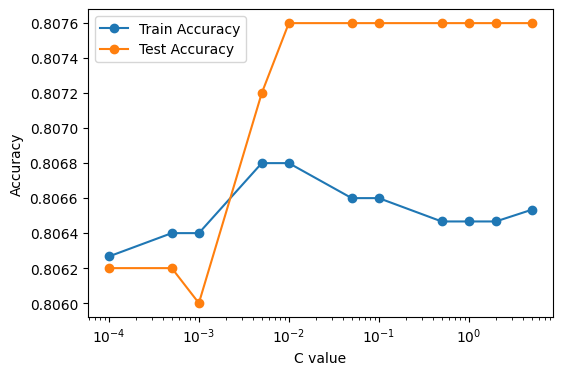

In [44]:
# Creating a validation curve
plt.figure(figsize=(6, 4))
plt.plot(C_list, train_accuracy, 'o-', label='Train Accuracy')
plt.plot(C_list, test_accuracy, 'o-', label='Test Accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

In [45]:
clf = LogisticRegression(max_iter = 10000, C=0.1)
clf.fit(X_train_ss, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [46]:
# making predictions
pred_tr1 = clf.predict(X_train_ss)
pred_tr1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
pred_ts1 = clf.predict(X_test_ss)
pred_ts1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
# Creating confusion matrix
confusion_tr1 = metrics.confusion_matrix(y_train, pred_tr1)
confusion_tr1

array([[12044,    50],
       [ 2851,    55]], dtype=int64)

In [49]:
# accuracy for test
confusion_ts1 = metrics.confusion_matrix(y_test, pred_ts1)
confusion_ts1

array([[4020,   11],
       [ 951,   18]], dtype=int64)

In [50]:
# Recall(Sensitivity)
recall = recall_score(y_test, pred_ts1)
recall

0.018575851393188854

In [51]:
# Precision
precision = metrics.precision_score(y_test, pred_ts1)
precision

0.6206896551724138

In [52]:
# Calculating F1 score
f1score = metrics.f1_score(y_test, pred_ts1)
f1score

0.036072144288577156

Scaling/normalizing didn't improve the performance that much.

### K Nearest Neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# clf = KNeighborsClassifier(n_neighbors=1)
# clf = KNeighborsClassifier(n_neighbors=3)
# clf = KNeighborsClassifier(n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=21)

In [55]:
# Initiating the classifier and fitting the model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=21)

In [56]:
knn = clf.fit(X_train, y_train)

In [57]:
# predictions
pred_knn = clf.predict(X_train)
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# predicting test data
predts_knn = clf.predict(X_test)
predts_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# accuracy(train)
(y_train == pred_knn).mean()

0.8065333333333333

In [60]:
# accuracy(test)
(y_test == predts_knn).mean()

0.804

In [61]:
# Confusion matrices
knn_conf_tr = metrics.confusion_matrix(y_train, pred_knn)
knn_conf_tr

array([[12065,    29],
       [ 2873,    33]], dtype=int64)

In [62]:
knn_conf_ts = metrics.confusion_matrix(y_test, predts_knn)
knn_conf_ts

array([[4014,   17],
       [ 963,    6]], dtype=int64)

In [63]:
# Recall
recall_knn = recall_score(y_test, predts_knn)
recall_knn

0.006191950464396285

In [64]:
# Precision
precision_knn = metrics.precision_score(y_test, predts_knn)
precision_knn

0.2608695652173913

In [65]:
# F1 score
f1score_knn = metrics.f1_score(y_test, predts_knn)
f1score_knn

0.012096774193548388

1. k = 1, This model has performed better than the Logistic regression but it is still a poor model for our dataset.
2. k = 3, didn't perform better than knn with k =1.
3. k = 5, performed as same as knn with k = 3.
4. k = 21, didn't perform well.

In [66]:
# K value
K_list = [1,3,5,7,9,15,17,19,21]

In [67]:
# Initializing empty lists
train_accuracy = []
test_accuracy = []

for k in K_list:
    # KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predictions
    y_train_pred_knn = knn.predict(X_train)
    y_test_pred_knn = knn.predict(X_test)
    
    # Accuracy
    train_acc_knn = metrics.accuracy_score(y_train, y_train_pred_knn)
    # For test
    test_acc_knn = metrics.accuracy_score(y_test, y_test_pred_knn)
    train_accuracy.append(train_acc_knn)
    test_accuracy.append(test_acc_knn)

# Numpy array results
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)

# output
for i in range(len(K_list)):
    print(f"K: {K_list[i]}, Train Accuracy: {train_accuracy[i]}, Test Accuracy: {test_accuracy[i]}")

K: 1, Train Accuracy: 1.0, Test Accuracy: 0.7018
K: 3, Train Accuracy: 0.8511333333333333, Test Accuracy: 0.7594
K: 5, Train Accuracy: 0.8266666666666667, Test Accuracy: 0.7784
K: 7, Train Accuracy: 0.8178666666666666, Test Accuracy: 0.784
K: 9, Train Accuracy: 0.8118, Test Accuracy: 0.7942
K: 15, Train Accuracy: 0.8088, Test Accuracy: 0.8008
K: 17, Train Accuracy: 0.8061333333333334, Test Accuracy: 0.802
K: 19, Train Accuracy: 0.8066, Test Accuracy: 0.804
K: 21, Train Accuracy: 0.8065333333333333, Test Accuracy: 0.804


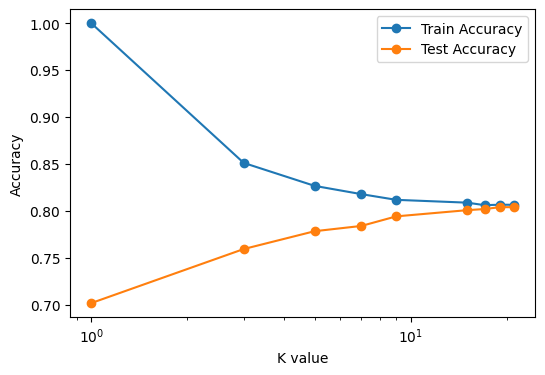

In [68]:
# Validation curve
plt.figure(figsize=(6, 4))
plt.plot(K_list, train_accuracy, 'o-', label='Train Accuracy')
plt.plot(K_list, test_accuracy, 'o-', label='Test Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

In [69]:
y.value_counts()

0    16125
1     3875
Name: y, dtype: int64

There is class imbalance in the data which might be causing overfitting in our model which might be affecting the model performance.

In [70]:
from sklearn.utils import resample

minor_class = df[df['y'] == 1]
major_class = df[df['y'] == 0]

# Undersampling the majority
unsamp_class = resample(major_class, replace=False, n_samples=len(minor_class), random_state=123)

# Combining undersampled majority class to the minor class
unsamp_df = pd.concat([minor_class, unsamp_class])
unsamp_df = unsamp_df.sample(frac=1, random_state=123).reset_index(drop=True)

# Class distribution
print(unsamp_df['y'].value_counts())

1    3875
0    3875
Name: y, dtype: int64


In [71]:
unsamp_df

,MONTH,DAY_OF_WEEK,y,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,5,7,1,1000-1059,10,2,19,169,United Air Lines Inc.,11587,...,Los Angeles International,0.20,0.0,0.0,90.0,10.51,0.212820,0.196347,0.211331,0.156042
1,12,3,1,0800-0859,3,2,18,149,Alaska Airlines Inc.,12269,...,Portland International,0.30,0.0,0.0,46.0,6.93,0.240705,0.164017,0.196265,0.131552
2,5,2,1,2100-2159,4,4,15,76,"Midwest Airline, Inc.",11587,...,Minneapolis-St Paul International,0.77,0.0,0.0,76.0,5.37,0.167418,0.114277,0.190877,0.318362
3,6,4,0,1300-1359,9,2,4,150,JetBlue Airways,2091,...,Fort Lauderdale-Hollywood International,0.36,0.0,0.0,65.0,10.96,0.294506,0.304036,0.251477,0.232153
4,10,4,1,1800-1859,2,6,88,66,SkyWest Airlines Inc.,29960,...,Cleveland-Hopkins International,0.57,0.0,0.0,67.0,10.29,0.147942,0.125995,0.192619,0.226215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,3,6,0,0600-0659,4,1,9,140,American Airlines Inc.,2963,...,NONE,0.00,0.0,0.0,73.0,5.82,0.190791,0.187867,0.190456,0.064816
7746,6,4,1,1400-1459,1,4,65,50,SkyWest Airlines Inc.,28904,...,Duluth International,0.05,0.0,0.0,68.0,14.09,0.208210,0.187867,0.251477,0.267314
7747,4,2,1,2000-2059,5,4,26,162,JetBlue Airways,11588,...,Fort Lauderdale-Hollywood International,0.02,0.0,0.0,64.0,4.70,0.267584,0.225439,0.138603,0.248850
7748,3,7,0,0600-0659,5,1,21,160,American Airlines Inc.,23912,...,NONE,0.00,0.0,0.0,54.0,10.74,0.190791,0.187867,0.191473,0.064816


This is a balanced data with equal number of 0s and 1s in the target column. We hope that this would improve the model performance.

### Decision Tree

In [72]:
X = unsamp_df.drop(['y'], axis=1)
X

,MONTH,DAY_OF_WEEK,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,5,7,1000-1059,10,2,19,169,United Air Lines Inc.,11587,53980,...,Los Angeles International,0.20,0.0,0.0,90.0,10.51,0.212820,0.196347,0.211331,0.156042
1,12,3,0800-0859,3,2,18,149,Alaska Airlines Inc.,12269,21752,...,Portland International,0.30,0.0,0.0,46.0,6.93,0.240705,0.164017,0.196265,0.131552
2,5,2,2100-2159,4,4,15,76,"Midwest Airline, Inc.",11587,27470,...,Minneapolis-St Paul International,0.77,0.0,0.0,76.0,5.37,0.167418,0.114277,0.190877,0.318362
3,6,4,1300-1359,9,2,4,150,JetBlue Airways,2091,24204,...,Fort Lauderdale-Hollywood International,0.36,0.0,0.0,65.0,10.96,0.294506,0.304036,0.251477,0.232153
4,10,4,1800-1859,2,6,88,66,SkyWest Airlines Inc.,29960,71625,...,Cleveland-Hopkins International,0.57,0.0,0.0,67.0,10.29,0.147942,0.125995,0.192619,0.226215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,3,6,0600-0659,4,1,9,140,American Airlines Inc.,2963,78308,...,NONE,0.00,0.0,0.0,73.0,5.82,0.190791,0.187867,0.190456,0.064816
7746,6,4,1400-1459,1,4,65,50,SkyWest Airlines Inc.,28904,71188,...,Duluth International,0.05,0.0,0.0,68.0,14.09,0.208210,0.187867,0.251477,0.267314
7747,4,2,2000-2059,5,4,26,162,JetBlue Airways,11588,24966,...,Fort Lauderdale-Hollywood International,0.02,0.0,0.0,64.0,4.70,0.267584,0.225439,0.138603,0.248850
7748,3,7,0600-0659,5,1,21,160,American Airlines Inc.,23912,78308,...,NONE,0.00,0.0,0.0,54.0,10.74,0.190791,0.187867,0.191473,0.064816


In [73]:
# Removing non-numeric variables
col_drop = ['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
X = X.drop(columns=col_drop)

In [74]:
y = unsamp_df.y
y.head()

0    1
1    1
2    1
3    0
4    1
Name: y, dtype: int64

In [75]:
# split the datasets into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 123, test_size= 0.25)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=123)

In [76]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier(random_state=123)

In [78]:
# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [79]:
# Predicting training and validation
y_tr_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)

In [80]:
from sklearn.metrics import accuracy_score
# Training accuracy
acc_dt_train = accuracy_score(y_train, y_tr_pred)
print("Training accuracy: {:.2f}".format( acc_dt_train))

# Validation accuracy
acc_dt_val = accuracy_score(y_val, y_val_pred)
print("Validation accuracy: {:.2f}".format( acc_dt_val))

Training accuracy: 1.00
Validation accuracy: 0.56


In [81]:
# Train
from sklearn.metrics import confusion_matrix
conf_dt_tr = confusion_matrix(y_train, y_tr_pred)
print(conf_dt_tr)

[[2906    0]
 [   0 2906]]


In [82]:
# For validation
conf_dt_val = confusion_matrix(y_val, y_val_pred)
print(conf_dt_val)

[[273 213]
 [218 265]]


In [83]:
from sklearn.metrics import classification_report
# Accuracy of the validation
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_val_pred)))

# Precision of the validation 
print("Precision: {:.2f}".format(precision_score(y_val, y_val_pred)))

# Recall of the validation
print("Recall(Sensitivity): {:.2f}".format(recall_score(y_val, y_val_pred)))

# F1-score of the validation
print("F1-score: {:.2f}".format(f1_score(y_val, y_val_pred)))

#Specificity of the validation 
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity: {:.2f}".format(specificity))

# Classification report
print('\n')
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

Accuracy: 0.56
Precision: 0.55
Recall(Sensitivity): 0.55
F1-score: 0.55
Specificity: 0.56


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       486
           1       0.55      0.55      0.55       483

    accuracy                           0.56       969
   macro avg       0.56      0.56      0.56       969
weighted avg       0.56      0.56      0.56       969



In [84]:
from sklearn.model_selection import GridSearchCV
# Grid search
param_grid = {'min_samples_split': range(1, 26)}

# Using 5-fold cv
grid_search = GridSearchCV(dt, param_grid, cv=5)  
grid_search.fit(X_train, y_train)

samples_split = grid_search.best_params_ 
best_score = grid_search.best_score_

print("Best Min Samples Split: ", samples_split)
print("Best Score: ", best_score)

Best Min Samples Split:  {'min_samples_split': 12}
Best Score:  0.5652076430029169


C:\Users\SRINI\anaconda3\envs\spyder\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SRINI\anaconda3\envs\spyder\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SRINI\anaconda3\envs\spyder\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\SRINI\anaconda3\envs\spyder\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\SRINI\anaco

In [85]:
dt1 = DecisionTreeClassifier(min_samples_split=25, random_state=123)
dt1.fit(X_train, y_train)

# Prediction
y_val_pred1 = dt1.predict(X_val)

In [86]:
print("For min_samples_split = 25:")

# confusion matrix
cm1 = confusion_matrix(y_val, y_val_pred1)
print("Confusion Matrix:")
print(cm1)

# Accuracy of the validation set
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_val_pred1)))

# Precision of the validation set
print("Precision: {:.2f}".format(precision_score(y_val, y_val_pred1)))

# Recall of the validation set
print("Recall(Sensitivity): {:.2f}".format(recall_score(y_val, y_val_pred1)))

# F1-score of the validation set
print("F1-score: {:.2f}".format(f1_score(y_val, y_val_pred1)))

#Specificity of the validation set
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred1).ravel()
specificity = tn / (tn + fp)
print("Specificity: {:.2f}".format(specificity))

# Classification report
print('\n')
print("Classification Report:")
print(classification_report(y_val, y_val_pred1))

For min_samples_split = 25:
Confusion Matrix:
[[269 217]
 [217 266]]
Accuracy: 0.55
Precision: 0.55
Recall(Sensitivity): 0.55
F1-score: 0.55
Specificity: 0.55


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       486
           1       0.55      0.55      0.55       483

    accuracy                           0.55       969
   macro avg       0.55      0.55      0.55       969
weighted avg       0.55      0.55      0.55       969



In [87]:
from sklearn.model_selection import GridSearchCV

# grid search
param_grid = {'max_depth': range(1, 26)}  # Searching for max_depth from 1 to 20

# using cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5)  #5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# best parameters
best_max_depth = grid_search.best_params_  #['max_depth']
best_score = grid_search.best_score_

print("Best Max Depth: ", best_max_depth)
print("Best Score: ", best_score)

Best Max Depth:  {'max_depth': 6}
Best Score:  0.6066758620281396


In [88]:
# Decision tree
dt2 = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fitting the model
dt2.fit(X_train, y_train)

# Prediction on validation
y_val_pred2 = dt2.predict(X_val)

In [89]:
# Performance metrics
print("For max_depth = 5")

#confusion matrix
cm2 = confusion_matrix(y_val, y_val_pred2)
print("Confusion Matrix:")
print(cm2)
print('\n')

# Accuracy of the validation
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_val_pred2)))

# Precision of the validation
print("Precision: {:.2f}".format(precision_score(y_val, y_val_pred2)))

# Recall of the validation
print("Recall(Sensitivity): {:.2f}".format(recall_score(y_val, y_val_pred2)))

# F1-score of the validation
print("F1-score: {:.2f}".format(f1_score(y_val, y_val_pred2)))

#Specificity of the validation
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred2).ravel()
specificity = tn / (tn + fp)
print("Specificity: {:.2f}".format(specificity))

# Classification report
print('\n')
print("Classification Report:")
print(classification_report(y_val, y_val_pred2))

For max_depth = 5
Confusion Matrix:
[[355 131]
 [241 242]]


Accuracy: 0.62
Precision: 0.65
Recall(Sensitivity): 0.50
F1-score: 0.57
Specificity: 0.73


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       486
           1       0.65      0.50      0.57       483

    accuracy                           0.62       969
   macro avg       0.62      0.62      0.61       969
weighted avg       0.62      0.62      0.61       969



In [90]:
# decision tree
dt3 = DecisionTreeClassifier(max_depth=5, min_samples_split=25, random_state=123)

# Fitting the model
dt3.fit(X_train, y_train)

# Prediction on validation 
y_val_pred3 = dt3.predict(X_val)

In [91]:
# Performance metrics
print("For max_depth = 5; min_samples_split=25")
print("\n")

#confusion matrix
cm3 = confusion_matrix(y_val, y_val_pred3)
print("Confusion Matrix:")
print(cm3)

# Accuracy of the validation set
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_val_pred3)))

# Precision of the validation set
print("Precision: {:.2f}".format(precision_score(y_val, y_val_pred3)))

# Recall of the validation set
print("Recall(Sensitivity): {:.2f}".format(recall_score(y_val, y_val_pred3)))

# F1-score of the validation set
print("F1-score: {:.2f}".format(f1_score(y_val, y_val_pred3)))

#Specificity of the validation set
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred3).ravel()
specificity = tn / (tn + fp)
print("Specificity: {:.2f}".format(specificity))

# Classification report
print('\n')
print("Classification Report:")
print(classification_report(y_val, y_val_pred3))

For max_depth = 5; min_samples_split=25


Confusion Matrix:
[[353 133]
 [240 243]]
Accuracy: 0.62
Precision: 0.65
Recall(Sensitivity): 0.50
F1-score: 0.57
Specificity: 0.73


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.73      0.65       486
           1       0.65      0.50      0.57       483

    accuracy                           0.62       969
   macro avg       0.62      0.61      0.61       969
weighted avg       0.62      0.62      0.61       969



In [92]:
import matplotlib.pyplot as plt

def plot_variable_importance(model, feature_names):
    importances = model.feature_importances_
    # Sort 
    indices = np.argsort(importances)[::-1]

    # Plot the variable importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), importances[indices])
    plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
    plt.xlabel('Variable Importance')
    plt.title('Variable Importance Plot')
    plt.show()


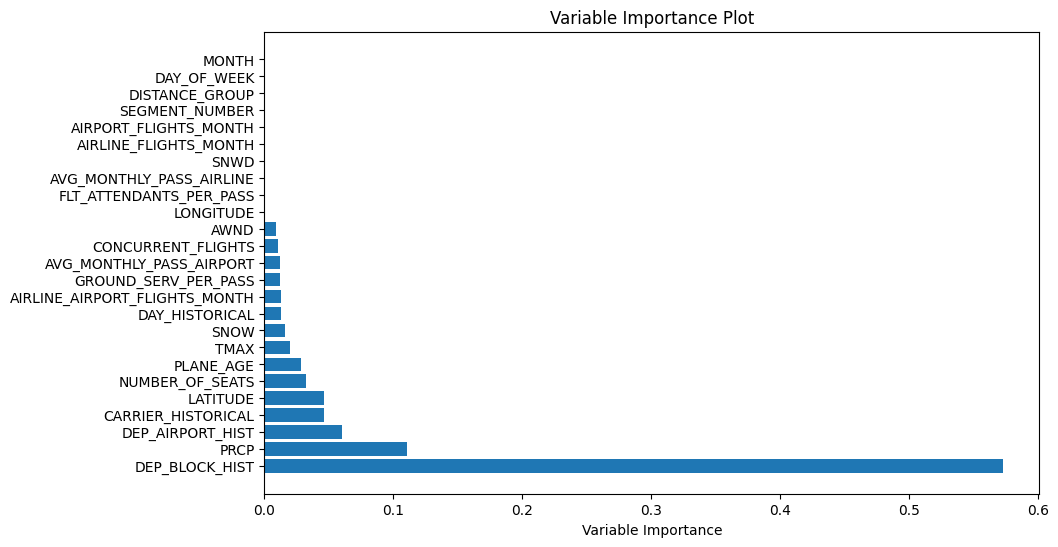

In [93]:
plot_variable_importance(dt3, feature_names=X.columns[:])

In [94]:
dt3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01075023,
       0.03195771, 0.        , 0.        , 0.01246659, 0.01172484,
       0.        , 0.        , 0.0121535 , 0.02863574, 0.04581257,
       0.        , 0.11036144, 0.01586426, 0.        , 0.01945057,
       0.00907637, 0.04592815, 0.06047084, 0.01271863, 0.57262857])

The Decision Tree Model has performed a lot better than previous models. 

### Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# code
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)
# prediction
r_pred_tr = rf.predict(X_train)
r_pred_val = rf.predict(X_val)

In [97]:
# Training accuracy
acc_rf_train = accuracy_score(y_train, r_pred_tr)
print("Training accuracy of the random forest model with default parameters: {:.2f}".format( acc_rf_train))

# Validation accuracy
acc_rf_val = accuracy_score(y_val, r_pred_val)
print("Validation accuracy of the random forest model with default parameters: {:.2f}".format( acc_rf_val))

Training accuracy of the random forest model with default parameters: 1.00
Validation accuracy of the random forest model with default parameters: 0.62


In [98]:
# Confusion matrix
# Training 
conf_rf_tr = confusion_matrix(y_train, r_pred_tr)
print(conf_rf_tr)

[[2906    0]
 [   0 2906]]


In [99]:
# Validation
conf_rf_val = confusion_matrix(y_val, r_pred_val)
print(conf_rf_val)

[[314 172]
 [195 288]]


In [100]:
# Performance metrics
print("Random Forest Classifier:")

# Accuracy of the validation
print("Accuracy: {:.2f}".format(accuracy_score(y_val, r_pred_val)))

# Precision of the validation
print("Precision: {:.2f}".format(precision_score(y_val, r_pred_val)))

# Recall of the validation
print("Recall(Sensitivity): {:.2f}".format(recall_score(y_val, r_pred_val)))

# F1-score of the validation
print("F1-score: {:.2f}".format(f1_score(y_val, r_pred_val)))

#Specificity of the validation
tn, fp, fn, tp = confusion_matrix(y_val, r_pred_val).ravel()
specificity = tn / (tn + fp)
print("Specificity: {:.2f}".format(specificity))

# Classification report
print('\n')
print("Classification Report:")
print(classification_report(y_val, r_pred_val))

Random Forest Classifier:
Accuracy: 0.62
Precision: 0.63
Recall(Sensitivity): 0.60
F1-score: 0.61
Specificity: 0.65


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       486
           1       0.63      0.60      0.61       483

    accuracy                           0.62       969
   macro avg       0.62      0.62      0.62       969
weighted avg       0.62      0.62      0.62       969



In [101]:
# grid search
param_grid = {
    'max_depth': range(1, 26),  
    'min_samples_split': [5, 10, 20, 50], 
    'n_estimators': [1, 2, 5, 10, 15]  
}

# using cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train) 

# best parameters
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

print("Best Max Depth: ", best_max_depth)
print("Best Min Samples Split: ", best_min_samples_split)
print("Best n_estimators: ", best_n_estimators)
print("Best Score: ", best_score)

Best Max Depth:  7
Best Min Samples Split:  50
Best n_estimators:  10
Best Score:  0.6209569884993852


In [102]:
# random forest classifier
rf1 = RandomForestClassifier(min_samples_split=50, max_depth=6, n_estimators=15, random_state=123)

# Fitting the model
rf1.fit(X_train, y_train)

# Prediction on validation
rf_pred_val1 = rf1.predict(X_val)

In [103]:
print("Hyperparameters of Random Forest Classifier: min_samples_split = 50, max_depth=6, n_estimators=15")
print("\n")

#confusion matrix
cm1_rf = confusion_matrix(y_val, rf_pred_val1)
print("Confusion Matrix:")
print(cm1_rf)
print("\n")

# Accuracy of the validation
print("Accuracy: {:.2f}".format(accuracy_score(y_val, rf_pred_val1)))

# Precision of the validation
print("Precision: {:.2f}".format(precision_score(y_val, rf_pred_val1)))

# Recall of the validation
print("Recall(Sensitivity): {:.2f}".format(recall_score(y_val, rf_pred_val1)))

# F1-score of the validation
print("F1-score: {:.2f}".format(f1_score(y_val, rf_pred_val1)))

#Specificity of the validation
tn, fp, fn, tp = confusion_matrix(y_val, rf_pred_val1).ravel()
specificity = tn / (tn + fp)
print("Specificity: {:.2f}".format(specificity))

# Classification report
print('\n')
print("Classification Report:")
print(classification_report(y_val, rf_pred_val1))

Hyperparameters of Random Forest Classifier: min_samples_split = 50, max_depth=6, n_estimators=15


Confusion Matrix:
[[296 190]
 [150 333]]


Accuracy: 0.65
Precision: 0.64
Recall(Sensitivity): 0.69
F1-score: 0.66
Specificity: 0.61


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       486
           1       0.64      0.69      0.66       483

    accuracy                           0.65       969
   macro avg       0.65      0.65      0.65       969
weighted avg       0.65      0.65      0.65       969



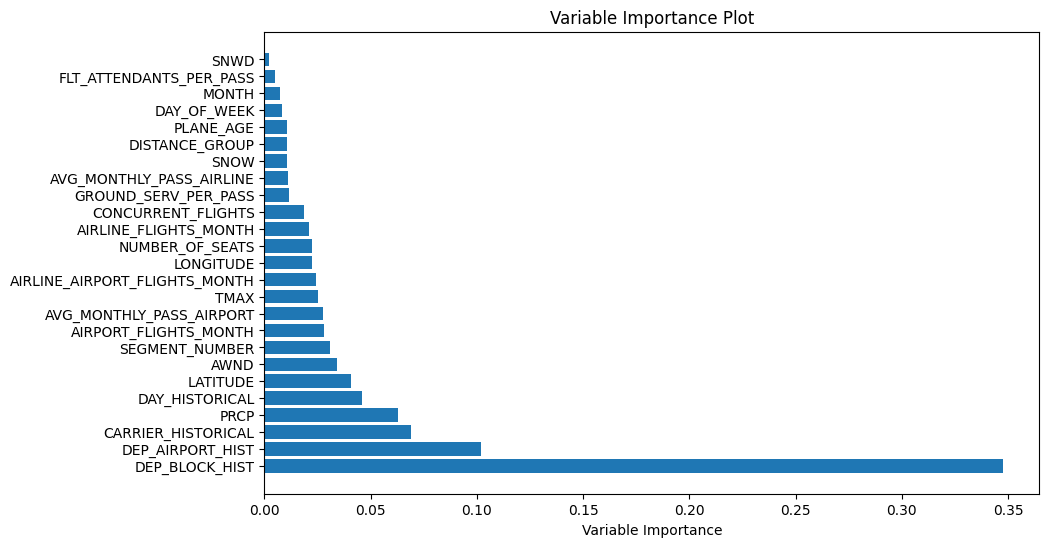

In [104]:
plot_variable_importance(rf1, feature_names=X.columns[:])

The Random Forest model has been the best model used so far in this project.

### Adaboost

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
# YOUR CODE
ab = AdaBoostClassifier()

#Fitting the model
ab.fit(X_train, y_train)

AdaBoostClassifier()

In [107]:
#Accuracy for train and test
ab_pred_train = ab.predict(X_train)
print("Accuracy, Adaboost Classifier for Training: ", metrics.accuracy_score(y_train, ab_pred_train))

ab_pred_val = ab.predict(X_val)
print("Accuracy, Adaboost Classifier for Testing: ", metrics.accuracy_score(y_val, ab_pred_val))

Accuracy, Adaboost Classifier for Training:  0.6440123881624226
Accuracy, Adaboost Classifier for Testing:  0.631578947368421


In [108]:
# confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=ab_pred_val.ravel(), rownames=['Actual'], colnames=['Predicted'])
conf_mat

Predicted,0,1
Actual,,
0,304,182
1,175,308


In [109]:
# Performance matrix
print("Adaboost Classifier:")

#Classification Report
print("Classification Report:")
print('\n')
ab_met = metrics.classification_report(y_val, ab_pred_val,  output_dict=True)
print(metrics.classification_report(y_val, ab_pred_val))

# performance metrics
print("\nPerformance Metrics:")

# Sensitivity
print("Sensitivity: %f"%(ab_met['1']['recall']))
# Specificity
print("Specificity: %f"%(ab_met['0']['recall']))
# Precision
print("Precision: %f"%(ab_met['1']['precision']))
# Accuracy
print("Accuracy: %f"%(ab_met['accuracy']))
# F1-score
print("F1-score: %f"%(ab_met['1']['f1-score']))

Adaboost Classifier:
Classification Report:


              precision    recall  f1-score   support

           0       0.63      0.63      0.63       486
           1       0.63      0.64      0.63       483

    accuracy                           0.63       969
   macro avg       0.63      0.63      0.63       969
weighted avg       0.63      0.63      0.63       969


Performance Metrics:
Sensitivity: 0.637681
Specificity: 0.625514
Precision: 0.628571
Accuracy: 0.631579
F1-score: 0.633094


In [110]:
from sklearn.model_selection import cross_val_score
L_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
acc_valid = []
for lr in L_rate:
    ada_bst = AdaBoostClassifier(learning_rate = lr, random_state = 123)
    ada_bst.fit(X_train, y_train)
    pred_train = ada_bst.predict(X_train)
    score_valid = cross_val_score(ada_bst, X_train, y_train, scoring = "f1", cv = 5)
    acc_valid.append(score_valid.mean())
print("f1 Score")
acc_valid

f1 Score


[0.6537943851958075,
 0.6537943851958075,
 0.6537943851958075,
 0.6397080794687208,
 0.6327915618369182,
 0.6183156077808437,
 0.6193056973784716]

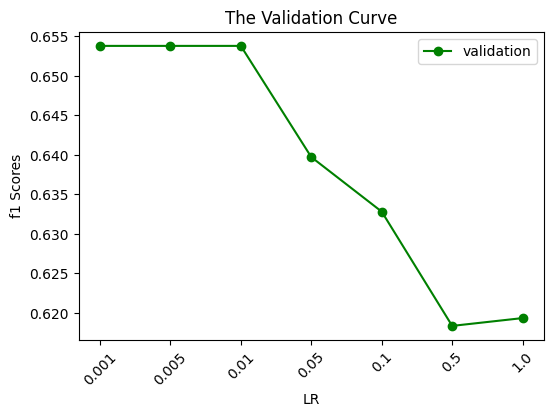

In [111]:
plt.figure(figsize=(6,4))
plt.title("The Validation Curve")
plt.plot(acc_valid, 'go-',label = 'validation')
plt.xticks(np.arange(len(L_rate)), L_rate, rotation = 45)
plt.xlabel('LR')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

In [112]:
# Computing the estimates
Est_list = [10, 50, 100, 200, 300, 400]
acc_valid = []
for et in Est_list:
    ada_bst = AdaBoostClassifier(n_estimators=et, random_state = 123)
    ada_bst.fit(X_train, y_train)
    pred_train = ada_bst.predict(X_train)
    score_valid= cross_val_score(ada_bst,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
print("f1 score")
acc_valid

f1 score


[0.6296640056483886,
 0.6193056973784716,
 0.6231117430953157,
 0.621253271276276,
 0.6165268013736025,
 0.6125626898463573]

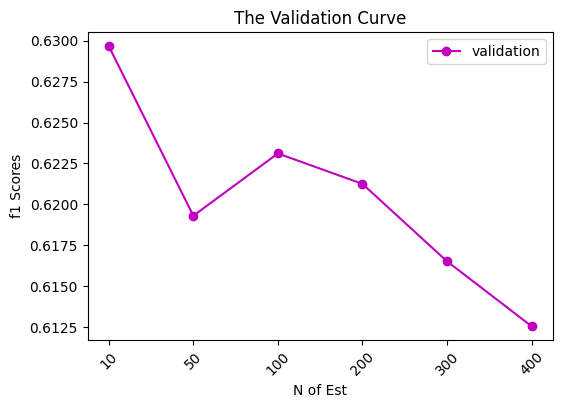

In [113]:
# Plotting the validation curve
plt.figure(figsize=(6,4))
plt.title("The Validation Curve")
plt.plot(acc_valid, 'mo-',label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('N of Est')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

In [114]:
# grid search
L_rate_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
Est_list = [10, 50, 100, 200, 300, 400]
params = {'n_estimators': Est_list,
         'learning_rate': L_rate_list, 'random_state': [123]}
ada_bst = AdaBoostClassifier()
#Grid Search
grid = GridSearchCV(estimator=ada_bst, param_grid=params, cv=5, verbose =1, scoring="f1", n_jobs=-1)

In [115]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [123]},
             scoring='f1', verbose=1)

In [116]:
grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 10, 'random_state': 123}

In [117]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.001, n_estimators=10, random_state=123)

In [118]:
# Grid Search
ada_bst = AdaBoostClassifier(learning_rate=0.001, n_estimators=10, random_state = 123)
ada_bst.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=10, random_state=123)

In [119]:
# Accuracy for Train and Test
pred_train = ada_bst.predict(X_train)
print("Accuracy Scores for Train: ",metrics.accuracy_score(y_train, pred_train))
pred = ada_bst.predict(X_val)
print("Accuracy Scores for Test: ",metrics.accuracy_score( y_val, pred))

Accuracy Scores for Train:  0.6044390915347557
Accuracy Scores for Test:  0.631578947368421


In [120]:
#Calculating the performance metrics
# confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
conf_mat
# confusion matrix
plt.show()
ada_bst_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))
# Calculating the performance metrics
print("\nPerformance Metrics:")
# Sensitivity
print("Sensitivity %f"%(ada_bst_met['1']['recall']))
# Specificity
print("Specificity %f"%(ada_bst_met['0']['recall']))
# Precision
print("Precision %f"%(ada_bst_met['1']['precision']))
# Accuracy
print("Accuracy %f"%(ada_bst_met['accuracy']))
# F1-score
print("F1-score %f"%(ada_bst_met['1']['f1-score']))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56       486
           1       0.60      0.80      0.68       483

    accuracy                           0.63       969
   macro avg       0.65      0.63      0.62       969
weighted avg       0.65      0.63      0.62       969


Performance Metrics:
Sensitivity 0.795031
Specificity 0.469136
Precision 0.598131
Accuracy 0.631579
F1-score 0.682667


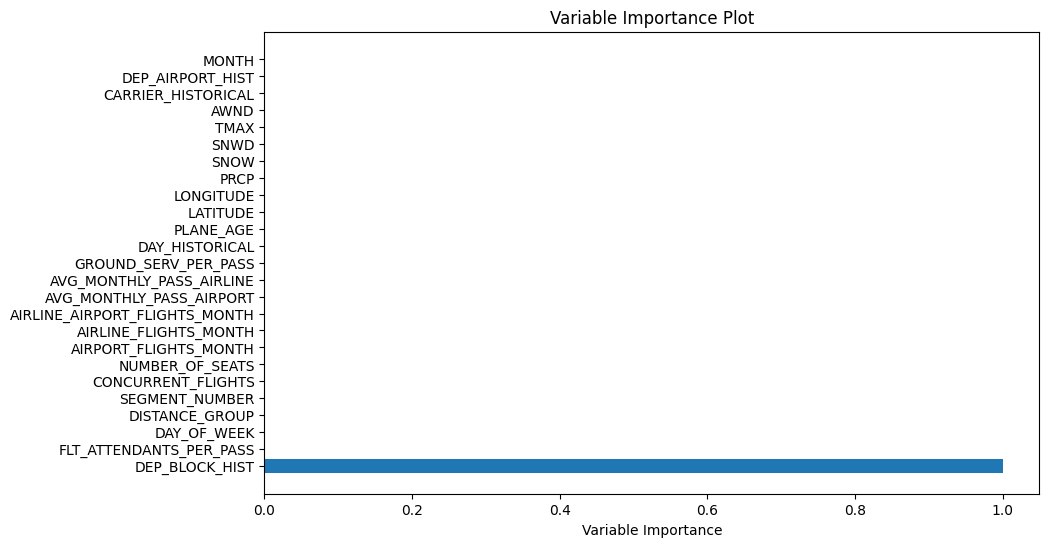

In [121]:
plot_variable_importance(ada_bst, feature_names=X.columns[:])

The Adaboost model has performed slightly better than the Random Forest.

### Gradient Boosting Machine

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
grd_bst = GradientBoostingClassifier()
grd_bst.fit(X_train, y_train)
pred_train = grd_bst.predict(X_train)
print("Accuracy score of Gradient Boosting for training data:", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
pred = grd_bst.predict(X_val)
print("Accuracy score of Gradient Boosting for testing data:", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy score of Gradient Boosting for training data: 0.6901238816242258
Accuracy score of Gradient Boosting for testing data: 0.6357069143446853


In [123]:
# confusion matrix
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
print(conf_mat)

Predicted    0    1
Actual             
0          311  175
1          178  305


In [124]:
print("Gradient Boosting Classifier:")

# Classification Report
print('Classification Report:')
print("\n")
grd_bst_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))

# Calculating the performance metrics
print("\nPerformance Metrics:")
print("\n")

# Sensitivity
print("Sensitivity %f"%(grd_bst_met['1']['recall']))
# Specificity
print("Specificity %f"%(grd_bst_met['0']['recall']))
# Precision
print("Precision %f"%(grd_bst_met['1']['precision']))
# Accuracy
print("Accuracy %f"%(grd_bst_met['accuracy']))
# F1-score
print("F1-score %f"%(grd_bst_met['1']['f1-score']))

Gradient Boosting Classifier:
Classification Report:


              precision    recall  f1-score   support

           0       0.64      0.64      0.64       486
           1       0.64      0.63      0.63       483

    accuracy                           0.64       969
   macro avg       0.64      0.64      0.64       969
weighted avg       0.64      0.64      0.64       969


Performance Metrics:


Sensitivity 0.631470
Specificity 0.639918
Precision 0.635417
Accuracy 0.635707
F1-score 0.633437


In [125]:
# Calculating the Learning Rate
L_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
acc_valid = []
for lr in L_rate:
    grd_bst = GradientBoostingClassifier(learning_rate=lr, random_state =123)
    grd_bst.fit(X_train, y_train)
    pred_train = grd_bst.predict(X_train)
    score_valid= cross_val_score(grd_bst,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
print("F1 score: ")
acc_valid

F1 score: 


[0.6454805025592008,
 0.6409801279351093,
 0.6376250779169423,
 0.6265056468679351,
 0.619332327206324,
 0.5898493189323547,
 0.5694235485330064]

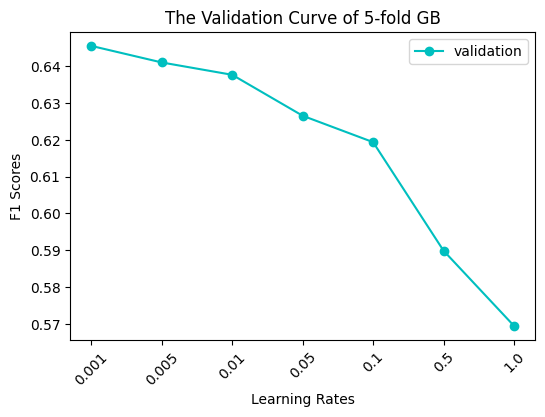

In [126]:
# Plotting the 5-fold for Gradient Boosting classifier
plt.figure(figsize=(6,4))

#Title
plt.title("The Validation Curve of 5-fold GB")
plt.plot(acc_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(L_rate_list)), L_rate_list, rotation = 45)
plt.xlabel('Learning Rates')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [127]:
# Calculating estimates
Est_list = [10, 50, 100, 200, 300, 400]
acc_valid = []
for et in Est_list:
    grd_bst = GradientBoostingClassifier(n_estimators=et, random_state =123)
    grd_bst.fit(X_train, y_train)
    pred_train = grd_bst.predict(X_train)
    score_valid= cross_val_score(grd_bst,X_train, y_train, scoring = "f1", cv =5 )
    acc_valid.append(score_valid.mean())
print("F1 score")
acc_valid

F1 score


[0.637122863329729,
 0.621976549188571,
 0.619332327206324,
 0.6174525376490495,
 0.6131281056383802,
 0.6091733345047005]

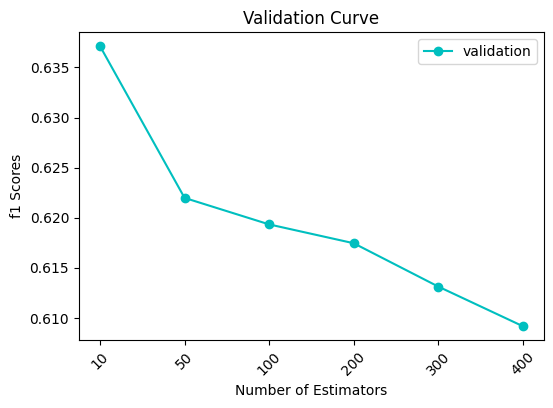

In [128]:
# Plotting the validation curve
plt.figure(figsize=(6,4))
plt.title("Validation Curve")
plt.plot(acc_valid, 'co-',label = 'validation')
plt.xticks(np.arange(len(Est_list)), Est_list, rotation = 45)
plt.xlabel('Number of Estimators')
plt.ylabel('f1 Scores')
plt.legend()
plt.show()

In [129]:
# Performing grid search
L_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
Est_list = [10, 50, 100, 200, 300, 400]
params = {'n_estimators': Est_list,
         'learning_rate': L_rate, 'random_state': [123]}
grd_bst = GradientBoostingClassifier()
#For f1 score
grid = GridSearchCV(estimator=grd_bst, param_grid=params, cv=5, verbose =1, scoring="f1", n_jobs=-1)

In [130]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                           1.0],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'random_state': [123]},
             scoring='f1', verbose=1)

In [131]:
grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 10, 'random_state': 123}

In [132]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.001, n_estimators=10,
                           random_state=123)

In [133]:
# grid search
grd_bst = GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state =123)
# grid search  
grd_bst.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50,
                           random_state=123)

In [134]:
# accuracy score
pred_train = grd_bst.predict(X_train)
print("Accuracy Scores for train: ",metrics.accuracy_score(y_true = y_train, y_pred = pred_train))
pred = grd_bst.predict(X_val)
print("Accuracy Scores for test: ",metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Scores for train:  0.6204404679972471
Accuracy Scores for test:  0.6429308565531475


In [135]:
# confusion matrix 
conf_mat = pd.crosstab(index=np.ravel(y_val), columns=pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
print(conf_mat)

grd_bst_met = metrics.classification_report(y_true = y_val, y_pred = pred,  output_dict=True)
print(metrics.classification_report(y_true = y_val, y_pred = pred))

# performance metrics
print("\nPerformance Metrics:")
#Sensitivity
print("Sensitivity %f"%(grd_bst_met['1']['recall']))
#Specificity
print("Specificity %f"%(grd_bst_met['0']['recall']))
#Precision
print("Precision %f"%(grd_bst_met['1']['precision']))
#Accuracy
print("Accuracy %f"%(grd_bst_met['accuracy']))
#F1-score
print("F1-score %f"%(grd_bst_met['1']['f1-score']))

Predicted    0    1
Actual             
0          275  211
1          135  348
              precision    recall  f1-score   support

           0       0.67      0.57      0.61       486
           1       0.62      0.72      0.67       483

    accuracy                           0.64       969
   macro avg       0.65      0.64      0.64       969
weighted avg       0.65      0.64      0.64       969


Performance Metrics:
Sensitivity 0.720497
Specificity 0.565844
Precision 0.622540
Accuracy 0.642931
F1-score 0.667946


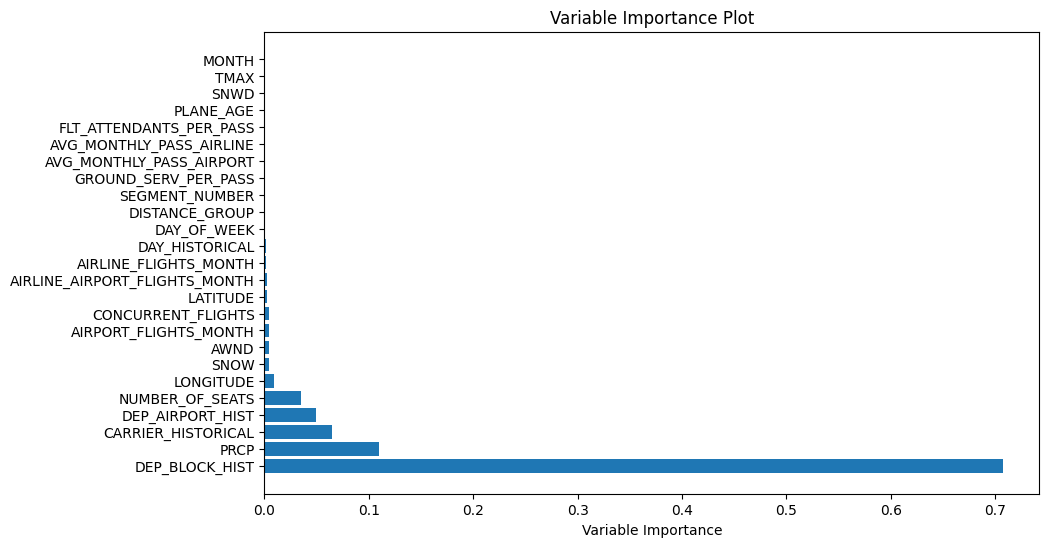

In [136]:
plot_variable_importance(grd_bst, feature_names=X.columns[:])

The Gradient boosting has performed very similar to the Random Forest. Adaboost is still the best model in this project.

From the above used classifiers in this project the variable **DEP_BLOCK_HIST** has been the most important variable for prediction.

### Results:
1. The models Logistic Regression and KNN didn't perform well for the data, even after normalizing the data the performance was not improving. After further analysis we found that it might be due to the class imbalance.
2. Then we used a sample data which was balanced.
3. We tried 4 more classification models[Decision Trees, Random Forest, Adaboost and Gradient Boosting machine] with different parameters.
4. Random forest, Adaboost and Gradient Boosting models performed well. Out of those Adaboost was slightly better than other two models.